In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startup-funding/startup_funding.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import squarify


In [3]:
data=pd.read_csv('../input/indian-startup-funding/startup_funding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
data.shape

(3044, 10)

In [5]:
data=data.rename(columns={"Date dd/mm/yyyy":"Date"})
data=data.rename(columns={"Startup Name":"StartupName"})
data=data.rename(columns={"Industry Vertical":"Industry"})
data=data.rename(columns={"SubVertical":"Sub_Industry"})
data=data.rename(columns={"City  Location":"Location"})
data=data.rename(columns={"Investors Name":"Investor"})
data=data.rename(columns={"InvestmentnType":"Investment_Type"})
data=data.rename(columns={"Amount in USD":"Amount_in_USD"})


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sr No            3044 non-null   int64 
 1   Date             3044 non-null   object
 2   StartupName      3044 non-null   object
 3   Industry         2873 non-null   object
 4   Sub_Industry     2108 non-null   object
 5   Location         2864 non-null   object
 6   Investor         3020 non-null   object
 7   Investment_Type  3040 non-null   object
 8   Amount_in_USD    2084 non-null   object
 9   Remarks          419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [7]:
data.tail()

,Sr No,Date,StartupName,Industry,Sub_Industry,Location,Investor,Investment_Type,Amount_in_USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [8]:
data['Remarks'].value_counts()

Series A                             175
Series B                              63
Pre-Series A                          37
Series C                              28
Series D                              11
                                    ... 
Pre Series-A                           1
QPrize Contest Winners                 1
pre-series A                           1
Personal Investment                    1
Strategic Funding, Minority stake      1
Name: Remarks, Length: 72, dtype: int64

In [9]:
total = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,2625,86.235217
Amount_in_USD,960,31.537451
Sub_Industry,936,30.749014
Location,180,5.913272
Industry,171,5.617608


In [10]:
del data["Remarks"]
data.head()

,Sr No,Date,StartupName,Industry,Sub_Industry,Location,Investor,Investment_Type,Amount_in_USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [11]:
data.isnull().sum()

Sr No                0
Date                 0
StartupName          0
Industry           171
Sub_Industry       936
Location           180
Investor            24
Investment_Type      4
Amount_in_USD      960
dtype: int64

<AxesSubplot:>

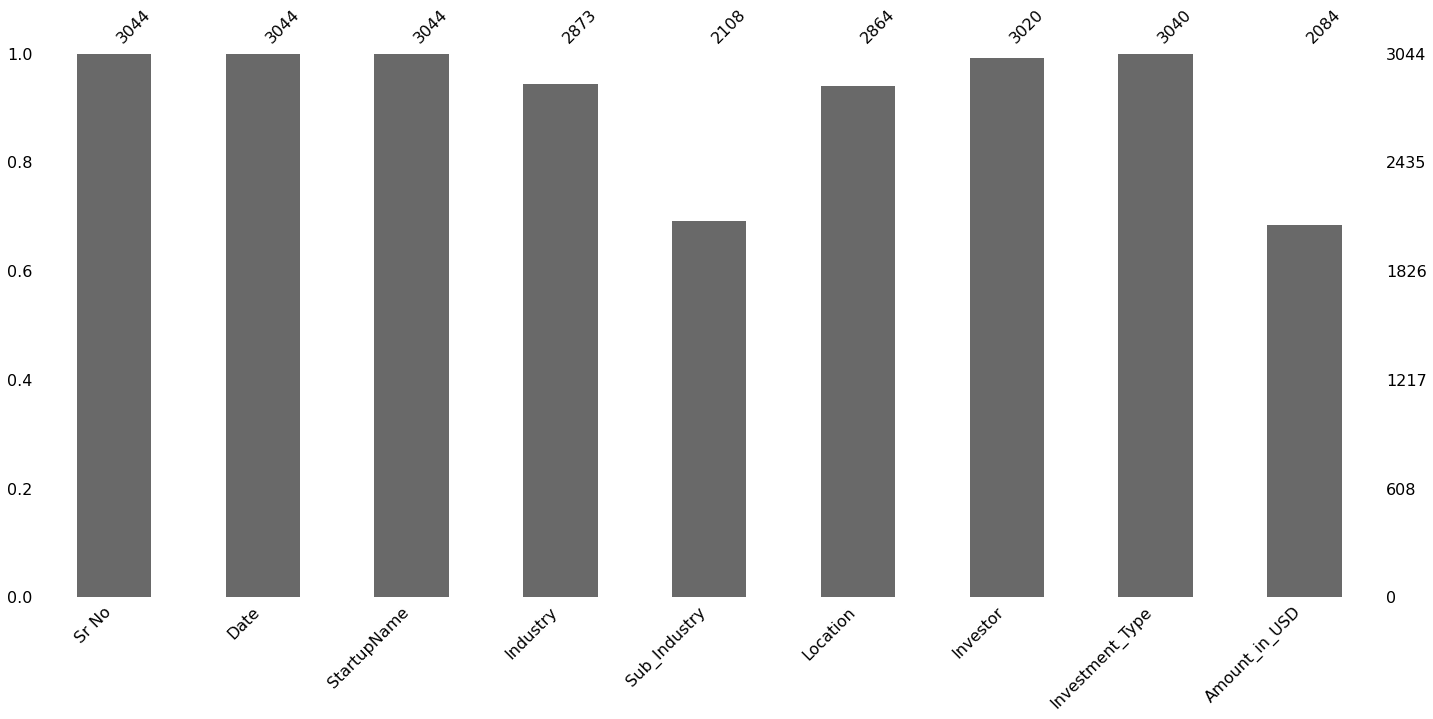

In [12]:
msno.bar(data)

<AxesSubplot:>

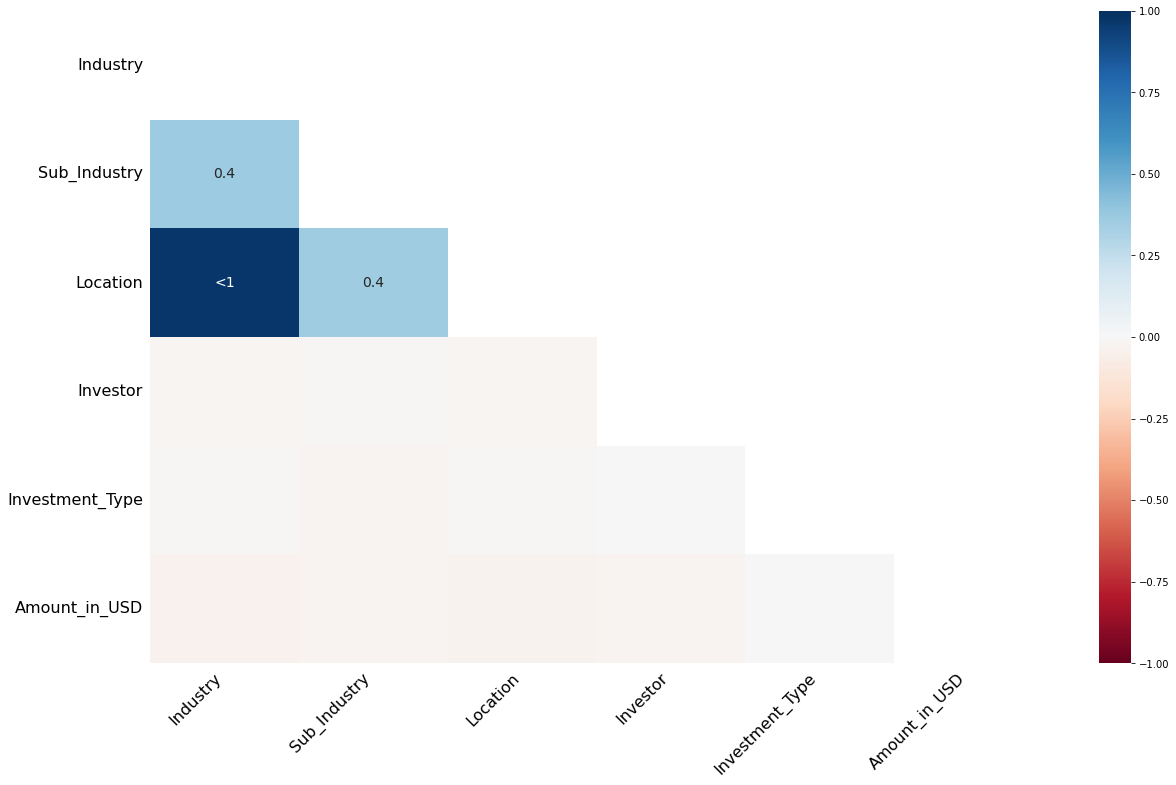

In [13]:
msno.heatmap(data)

In [14]:
data=data.fillna(method='pad')

In [15]:
data['Remarks'].isna()

KeyError: 'Remarks'

In [ ]:
data.isnull().sum()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data=data.dropna(subset=['Date'])
data['Date'] = pd.to_datetime(data['Date'])




In [ ]:
data = data.sort_values(by="Date")

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.dtypes

In [ ]:
data['Amount_in_USD'].unique()

In [ ]:
data['Amount_in_USD'].str.isnumeric()

In [ ]:
data['Amount_in_USD'].str.get(0)

In [ ]:
data['Amount_in_USD']=data['Amount_in_USD'].str.split(' ').str.get(0).str.replace(',','')
data['Amount_in_USD']


In [ ]:
def recorrect(x,y):
    if(len([x.str.contains('\\\\xc2\\\\xa0N/A')==True])>0):
        x=x.str.replace(r'\\\\xc2\\\\xa0N/A',"")
    if(len([x.str.contains('\\\\xc2\\\\xa010,000,000')==True])>0):
        x=x.str.replace('\\\\xc2\\\\xa010,000,000',"")
    if(len([x.str.contains('\\\\xc2\\\\xa05,000,000')==True])>0):
         x=x.str.replace('\\\\xc2\\\\xa05,000,000',"")
    if(len([x.str.contains('\\\\xc2\\\\xa020,000,000')==True])>0):
         x=x.str.replace('\\\\xc2\\\\xa020,000,000',"")
    if(len([x.str.contains('\\\\xc2\\\\xa016')==True])>0):   
         x=x.str.replace('\\\\xc2\\\\xa016',"")
    if(len([x.str.contains('\\\\xc2\\\\xa019,350,000')==True])>0):
           x=x.str.replace('\\\\xc2\\\\xa019,350,000',"")
    if(len([x.str.contains('\\\\xc2\\\\xa0685')==True])>0):
           x=x.str.replace('\\\\xc2\\\\xa0685',"")
    return x
    data['Amount_in_USD']=recorrect(data['Amount_in_USD'],data)

In [ ]:
def reformat(x,y):
    if(len(y[x.str.contains(r'\\\\xc2\\\\xa0')==True])>0):
        x=x.str.replace(r'\\\\xc2\\\\xa0',"")
    if(len(y[x.str.contains(r'https://www.wealthbucket.in/')==True])>0):
        x=x.str.replace(r'https://www.wealthbucket.in/',"wealthbucket")
    if(len(y[x.str.contains(r'\\\\xe2\\\\x80\\\\x99')==True])>0):
        x=x.str.replace(r'\\\\xe2\\\\x80\\\\x99',"")
    if(len(y[x.str.contains(r'\\xe2\\x80\\x99')]==True)>0):
        x=x.str.replace(r'\\xe2\\x80\\x99','')
    return x
    data['StartupName']=reformat(data['StartupName'],data)

In [ ]:
def correct_city(x,y):
    if(len(y[x.str.contains(r'\\\\xc2\\\\xa0')==True])>0):
        x=x.str.replace(r'\\\\xc2\\\\xa0',"")
    if(len(y[x.str.contains(r'\\\\\\\\xc2\\\\\\\\xa0')==True])>0):
        x=x.str.replace(r'\\\\\\\\xc2\\\\\\\\xa0',"")
    #Bengaluru
    if(len(y[x.str.contains('Bangalore')==True])>0):
        x=x.str.replace('Bangalore',"Bengaluru")
    if(len(y[x.str.contains('Bangalore')==True])>0):
        x=x.str.replace('Bangalore',"Bengaluru")
    if(len(y[x.str.contains(r'Bengaluru and Gurugram')==True])>0):
        x=x.str.replace(r'Bengaluru and Gurugram','Bengaluru')
    if(len(y[x.str.contains(r'Bengaluru/ Bangkok')==True])>0):
        x=x.str.replace(r'Bengluru/ Bangkok','Bengaluru')
    if(len(y[x.str.contains(r'Bengaluru / SFO')==True])>0):
        x=x.str.replace(r'Bengaluru / SFO','Bengaluru')
    if(len(y[x.str.contains(r'SFO / Bengaluru')==True])>0):
        x=x.str.replace(r'SFO / Bengaluru','Bengaluru')
    if(len(y[x.str.contains(r'Bengaluru/ Bangkok')==True])>0):
        x=x.str.replace(r'Bengaluru/ Bangkok','Bengaluru')
    if(len(y[x.str.contains(r'New York, Bengaluru')==True])>0):
        x=x.str.replace(r'New York, Bengaluru','Bengaluru')
    if(len(y[x.str.contains(r'Bengaluru / Palo Alto')==True])>0):
        x=x.str.replace(r'Bengaluru / Palo Alto','Bengaluru')
    if(len(y[x.str.contains(r'Bengaluru / San Mateo')==True])>0):
        x=x.str.replace(r'Bengaluru / San Mateo','Bengaluru')
    if(len(y[x.str.contains(r'Seattle / Bengaluru')==True])>0):
        x=x.str.replace(r'Seattle / Bengaluru','Bengaluru')
    if(len(y[x.str.contains(r'Bengaluru / USA')==True])>0):
        x=x.str.replace(r'Bengaluru / USA','Bengaluru')   
    #Gurgaon
    if(len(y[x.str.contains("Gurgaon")==True])>0):
        x=x.str.replace('Gurgaon','Gurugram')
    if(len(y[x.str.contains(r'Gurugram / SFO')==True])>0):
        x=x.str.replace(r'Gurugram / SFO','Bengaluru')
    #Delhi
    if(len(y[x.str.contains(r'Nw Delhi')==True])>0):
        x=x.str.replace('Nw Delhi','Delhi')
    if(len(y[x.str.contains(r'Delhi / California')==True])>0):
        x=x.str.replace('Delhi / California','Delhi')
    if(len(y[x.str.contains(r'Delhi / Houston')==True])>0):
        x=x.str.replace(r'Delhi / Houston','Delhi')
    if(len(y[x.str.contains(r'New Delhi')==True])>0):
        x=x.str.replace(r'New Delhi','Delhi')
    if(len(y[x.str.contains(r'Delhi / US')==True])>0):
        x=x.str.replace(r'Delhi / US','Delhi')
    if(len(y[x.str.contains(r'Delhi & Cambridge')==True])>0):
        x=x.str.replace(r'Delhi & Cambridge','Delhi')
    if(len(y[x.str.contains(r'Delhi/ Houston')==True])>0):
        x=x.str.replace(r'Delhi/ Houston','Delhi')
    
    #Goa
    if(len(y[x.str.contains(r'Goa/Hyderabad')==True])>0):
        x=x.str.replace(r'Goa/Hyderabad','Goa')
    if(len(y[x.str.contains(r'Panaji')==True])>0):
        x=x.str.replace(r'Panaji','Goa')
    #Mumbai
    if(len(y[x.str.contains(r'Mumbai / Global')==True])>0):
        x=x.str.replace(r'Mumbai / Global','Mumbai')
    if(len(y[x.str.contains(r'Andheri')==True])>0):
        x=x.str.replace(r'Andheri','Mumbai')
    if(len(y[x.str.contains(r'Mumbai/Bengaluru')==True])>0):
        x=x.str.replace(r'Mumbai/Bengaluru','Mumbai')
    if(len(y[x.str.contains(r'Mumbai / UK')==True])>0):
        x=x.str.replace(r'Mumbai / UK','Mumbai')
    if(len(y[x.str.contains(r'Mumbai / NY')==True])>0):
        x=x.str.replace(r'Mumbai / NY','Mumbai')
    #Pune
    if(len(y[x.str.contains(r'Pune / Singapore')==True])>0):
        x=x.str.replace(r'Pune / Singapore','Pune')
    if(len(y[x.str.contains(r'Pune / US')==True])>0):
        x=x.str.replace(r'Pune / US','Pune')
    if(len(y[x.str.contains(r'Pune / Dubai')==True])>0):
        x=x.str.replace(r'Pune / Dubai','Pune')
    if(len(y[x.str.contains(r'Pune/Seattle')==True])>0):
        x=x.str.replace(r'Pune/Seattle','Pune')
    #Hyderabad
    if(len(y[x.str.contains(r'Dallas / Hyderabad')==True])>0):
        x=x.str.replace(r'Dallas / Hyderabad','Hyderabad')
    if(len(y[x.str.contains(r'Hyderabad/USA')==True])>0):
        x=x.str.replace(r'Hyderabad/USA','Hyderabad')
    #Chennai
    if(len(y[x.str.contains(r'Chennai/ Singapore')==True])>0):
        x=x.str.replace(r'Chennai/ Singapore','Chennai')
    #Noida
    if(len(y[x.str.contains(r'Noida / Singapore')==True])>0):
        x=x.str.replace(r'Noida / Singapore','Noida')
    return x

data['Location']=correct_city(data['Location'],data)

In [ ]:
def correct_investor(x,y):
    if(len(y[x.str.contains(r'\\\\xc2\\\\xa0')==True])>0):
        x=x.str.replace(r'\\\\xc2\\\\xa0',"")
    if(len(y[x.str.contains(r'\\\\\\\\xc2\\\\\\\\xa0')==True])>0):
        x=x.str.replace(r'\\\\\\\\xc2\\\\\\\\xa0',"")
    if(len(y[x.str.contains(r'\\\\xe2\\\\x80\\\\x99O')==True])>0):
        x=x.str.replace(r'\\\\xe2\\\\x80\\\\x99O',"")
    if(len(y[x.str.contains(r'\\\\\\\\xe2\\\\\\\\x80\\\\\\\\x99O')==True])>0):
        x=x.str.replace(r'\\\\\\\\xe2\\\\\\\\x80\\\\\\\\x99O',"")
    if(len(y[x.str.contains(r'\\\xe2\\\\x80\\\\x99')==True])>0):
        x=x.str.replace(r'\\\xe2\\\\x80\\\\x99',"")
    if(len(y[x.str.contains(r'\\\\xe2\\\\x80\\\\x99')==True])>0):
        x=x.str.replace(r'\\\\xe2\\\\x80\\\\x99',"")
    if(len(y[x.str.contains(r'\\\\\\\\xc3\\\\\\\\x98')==True])>0):
        x=x.str.replace(r'\\\\\\\\xc3\\\\\\\\x98',"")
    if(len(y[x.str.contains(r'\\\\\\\\n\\\\\\\\n')==True])>0):
        x=x.str.replace(r'\\\\\\\\n\\\\\\\\n',"")

    if(len(y[x.str.contains(r'Undisclosed Investor')==True])>0):
        x=x.str.replace(r'Undisclosed Investor',"Undisclosed Investors")
    if(len(y[x.str.contains(r'Undisclosed investor')==True])>0):
        x=x.str.replace(r'Undisclosed investor',"Undisclosed Investors")
    if(len(y[x.str.contains(r'Undisclosed Investorss')==True])>0):
        x=x.str.replace(r'Undisclosed Investorss',"Undisclosed Investors")
    if(len(y[x.str.contains(r'Undisclosed HNIs')==True])>0):
        x=x.str.replace(r'Undisclosed HNIs',"Undisclosed Investors")
    if(len(y[x.str.contains(r'Undisclosed Angel investors & HNIs')==True])>0):
        x=x.str.replace(r"Undisclosed Angel investors & HNIs","Undisclosed Investors")
    if(len(y[x.str.contains(r'undisclosed investors')==True])>0):
        x=x.str.replace(r"undisclosed investors","Undisclosed Investors")
    if(len(y[x.str.contains(r'undisclosed investor')==True])>0):
        x=x.str.replace(r"undisclosed investor","Undisclosed Investors")
    if(len(y[x.str.contains(r'Undisclosed angel investors')==True])>0):
        x=x.str.replace(r"Undisclosed angel investors","Undisclosed Investors")
    if(len(y[x.str.contains(r'High Networth Individuals (undisclosed)')==True])>0):
        x=x.str.replace(r"High Networth Individuals (undisclosed)","Undisclosed Investors")
    if(len(y[x.str.contains(r'undisclosed private investors')==True])>0):
        x=x.str.replace(r"undisclosed private investors","Undisclosed Investors")
    if(len(y[x.str.contains(r'SoftBank Group')==True])>0):
        x=x.str.replace(r"SoftBank Group","SoftBank")
    if(len(y[x.str.contains(r'Softbank')==True])>0):
        x=x.str.replace(r"Softbank","SoftBank")
    return x
data['Investor']=correct_investor(data['Investor'],data)

In [ ]:
def correct_industry(x,y):
    if(len(y[x.str.contains(r'\\\\xc2\\\\xa0')==True])>0):
        x=x.str.replace(r'\\\\xc2\\\\xa0',"")
    if(len(y[x.str.contains(r'\\\\xc3\\\\xa9')==True])>0):
        x=x.str.replace(r'\\\\xc3\\\\xa9',"")
    if(len(y[x.str.contains(r'\\\\xe2\\\\x80\\\\x99s')==True])>0):
        x=x.str.replace(r'\\\\xe2\\\\x80\\\\x99',"")
    if(len(y[x.str.contains(r'\\xe2\\x80\\x93')==True])>0):
        x=x.str.replace(r'\\xe2\\x80\\x93',"")   
    if(len(y[x.str.contains(r'\\\\n')==True])>0):
        x=x.str.replace(r'\\\\n'," ")   
    if(len(y[x.str.contains(r'EdTech')==True])>0):
        x=x.str.replace(r'EdTech',"Ed-Tech")   
    if(len(y[x.str.contains(r'Edtech')==True])>0):
        x=x.str.replace(r'Edtech',"Ed-Tech")
    if(len(y[x.str.contains(r'Ecommerce')==True])>0):
        x=x.str.replace(r'Ecommerce',"E-commerce")
    if(len(y[x.str.contains(r'eCommerce')==True])>0):
        x=x.str.replace(r'eCommerce',"E-commerce")
    if(len(y[x.str.contains(r'ecommerce')==True])>0):
        x=x.str.replace(r'ecommerce',"E-commerce")
    if(len(y[x.str.contains(r'ECommerce')==True])>0):
        x=x.str.replace(r'ECommerce',"E-commerce")
    if(len(y[x.str.contains(r'E-Commerce')==True])>0):
        x=x.str.replace(r'E-Commerce',"E-commerce")
    if(len(y[x.str.contains(r'Fintech')==True])>0):
        x=x.str.replace(r'Fintech',"FinTech")
    if(len(y[x.str.contains(r'Fin-Tech')==True])>0):
        x=x.str.replace(r'Fin-Tech',"FinTech")
    if(len(y[x.str.contains(r'healthcare')==True])>0):
        x=x.str.replace(r'healthcare',"Healthcare")
    if(len(y[x.str.contains(r'SAAS')==True])>0):
        x=x.str.replace(r'SAAS',"SaaS")
    if(len(y[x.str.contains(r'Saas')==True])>0):
        x=x.str.replace(r'Saas',"SaaS")
    if(len(y[x.str.contains(r'logistics')==True])>0):
        x=x.str.replace(r'logistics',"Logistics")
    if(len(y[x.str.contains(r'OnDemand')==True])>0):
        x=x.str.replace(r'OnDemand',"OnDemand")
    if(len(y[x.str.contains(r'on-demand')==True])>0):
        x=x.str.replace(r'on-demand',"OnDemand")
    if(len(y[x.str.contains(r'online')==True])>0):
        x=x.str.replace(r'online',"Online")
    
    return x

data['Industry']=correct_industry(data['Industry'],data)

In [ ]:
def correct_funding(x,y):
    #Seed-Angel Funding
    if(len(y[x.str.contains(r'Seed/ Angel Funding')==True])>0):
        x=x.str.replace(r'Seed/ Angel Funding',"Seed Angel Funding")
    if(len(y[x.str.contains(r'Angel / Seed Funding')==True])>0):
        x=x.str.replace(r'Angel / Seed Funding',"Seed Funding")
    if(len(y[x.str.contains(r'Seed / Angel Funding')==True])>0):
        x=x.str.replace(r'Seed / Angel Funding',"Seed Angel Funding")
    if(len(y[x.str.contains(r'Seed / Angle Funding')==True])>0):
        x=x.str.replace(r'Seed / Angle Funding',"Seed Funding")
    if(len(y[x.str.contains(r'Seed/Angel Funding')==True])>0):
        x=x.str.replace(r'Seed/Angel Funding',"Seed Funding")
    #Seed Funding
    if(len(y[x.str.contains(r'Seed\\\\nFunding')==True])>0):
        x=x.str.replace(r'Seed\\\\nFunding',"Seed Funding")
    if(len(y[x.str.contains(r'Seed\\nFunding')==True])>0):
        x=x.str.replace(r'Seed\\nFunding',"Seed Funding")
    if(len(y[x.str.contains(r'Seed Round')==True])>0):
        x=x.str.replace(r'Seed Round',"Seed Funding")
    if(len(y[x.str.contains(r'Seed funding')==True])>0):
        x=x.str.replace(r'Seed funding',"Seed Funding")
    if(len(y[x.str.contains(r'Seed Funding Round')==True])>0):
        x=x.str.replace(r'Seed Funding Round',"Seed Funding")
    #Pre-Series A
    if(len(y[x.str.contains(r'pre-series A')==True])>0):
        x=x.str.replace(r'pre-series A',"Pre-Series A")
    if(len(y[x.str.contains(r'Pre Series A')==True])>0):
        x=x.str.replace(r'Pre Series A',"Pre-Series A")
    if(len(y[x.str.contains(r'Pre-series A')==True])>0):
        x=x.str.replace(r'Pre-series A',"Pre-Series A")
    if(len(y[x.str.contains(r'pre-Series A')==True])>0):
        x=x.str.replace(r'pre-Series A',"Pre-Series A")
    #Equity
    if(len(y[x.str.contains(r'Equity Based Funding')==True])>0):
        x=x.str.replace(r'Equity Based Funding',"Equity")
    #Angel
    if(len(y[x.str.contains(r'Angel Funding')==True])>0):
        x=x.str.replace(r'Angel Funding',"Angel")
    if(len(y[x.str.contains(r'Angel Round')==True])>0):
        x=x.str.replace(r'Angel Round',"Angel")
    #Private Equity
    if(len(y[x.str.contains(r'PrivateEquity')==True])>0):
        x=x.str.replace(r'PrivateEquity',"Private Equity")
    if(len(y[x.str.contains(r'Private Funding')==True])>0):
        x=x.str.replace(r'Private Funding',"Private Equity")
    if(len(y[x.str.contains(r'Private\\\\nEquity')==True])>0):
        x=x.str.replace(r'Private\\\\nEquity',"Private Equity")
    if(len(y[x.str.contains(r'Private Equity Round')==True])>0):
        x=x.str.replace(r'Private Equity Round',"Private Equity")
    return x
data['Investment_Type']=correct_funding(data['Investment_Type'],data)

In [ ]:
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data["yearmonth"] = (pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)
temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
data['year_month'] = data['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

In [ ]:
plt.plot(data['Date'],data['Name'])
plt.xlabel('Year')
plt.ylabel('No. of Startups')
plt.title('Number of Startups in the country over the years')
plt.rcParams['figure.figsize'] = (8, 4)

In [ ]:
sns.countplot(data['Date'].dt.year)
plt.xlabel('Year')
plt.ylabel('No. of Startups Funded')
plt.title('No of Startups Funded Over the Years')
plt.rcParams['figure.figsize'] = (10, 8)

In [ ]:
invest_amount=list(data.groupby(data['Investment_Type']).sum()['Amount_in_USD'])[:10]
typeof_invest = data['Investment_Type'].value_counts()[:10].index
plt.bar(typeof_invest,invest_amount)
plt.xlabel('Type of Investment')
plt.ylabel('Investment Amount in Billions')
plt.title('Type of investment vs Amount invested')
plt.rcParams['figure.figsize'] = (22, 10)

In [ ]:
fig1 = go.Figure(
    data=go.Pie(values=data['Industry'].value_counts()[:10].values,labels=data['Industry'].value_counts()[:10].index))
fig1.show()

In [ ]:
industry_vertical = data['Industry'].value_counts().head(10)
print(industry_vertical)
plt.figure(figsize=(15,8))
sns.barplot(industry_vertical.index, industry_vertical.values, alpha=0.9, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

In [ ]:
industry_data = data['Sub_Industry'].value_counts().head(10)
print(industry_data)
plt.figure(figsize=(15,8))
sns.barplot(industry_data.index, industry_data.values, alpha=0.9, color='yellow')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

In [ ]:
city = data['Location'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
count = data['Location'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top cities')